# Polfilter

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Dunkelrauschen:

In [32]:
ch1 = np.loadtxt('data/dunkelrauschen/ch1.txt',skiprows=1).T
ch2 = np.loadtxt('data/dunkelrauschen/ch2.txt',skiprows=1).T
diff = np.loadtxt('data/dunkelrauschen/diff.txt',skiprows=1).T
quotient = np.loadtxt('data/dunkelrauschen/quotient.txt',skiprows=1).T

0.005473594227712137
0.0050491682089552235
-0.02198584762996865
-0.04011984630484989


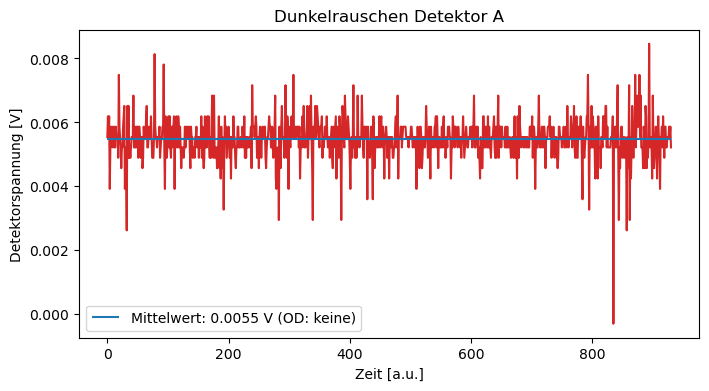

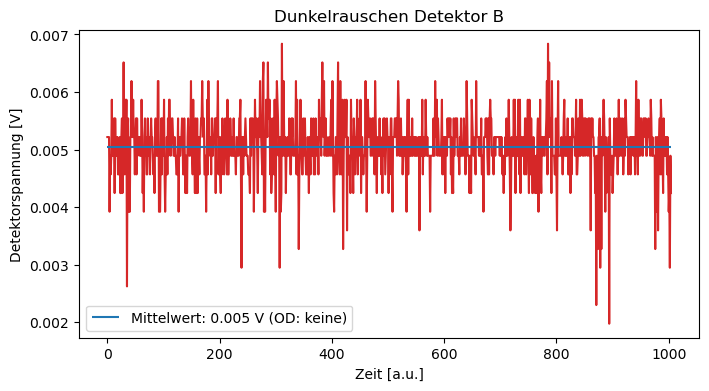

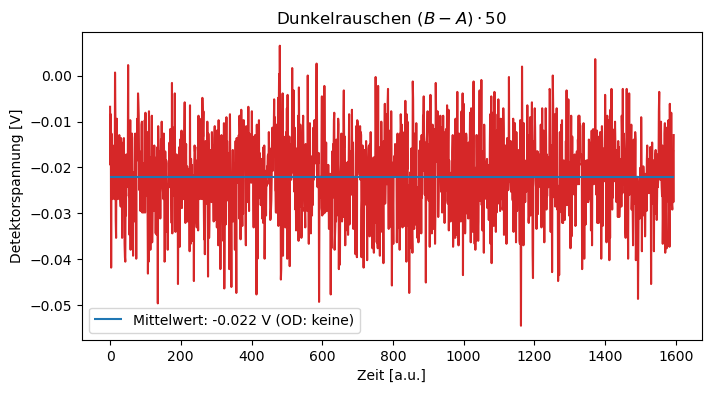

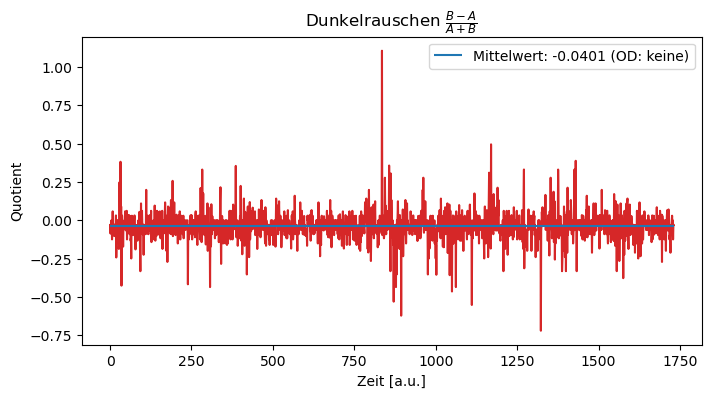

In [33]:
def dunkelrauschen(data,title,quotient=False):    
    plt.figure(figsize=(8,4))
    plt.plot(data[0],data[1],color='tab:red')
    mean = np.mean(data[1])
    print(mean)
    plt.title(title)
    plt.xlabel('Zeit [a.u.]')
    if quotient:
        plt.ylabel('Quotient')
        plt.hlines(mean,xmin=data[0][0],xmax=data[0][-1],color='tab:blue',label=f'Mittelwert: {round(mean,4)} (OD: keine)')
    else:
        plt.ylabel('Detektorspannung [V]')
        plt.hlines(mean,xmin=data[0][0],xmax=data[0][-1],color='tab:blue',label=f'Mittelwert: {round(mean,4)} V (OD: keine)')
    plt.legend()

dunkelrauschen(ch1,'Dunkelrauschen Detektor A')
plt.savefig('optiken/dunkelrauschen_A.pdf')
dunkelrauschen(ch2,'Dunkelrauschen Detektor B')
plt.savefig('optiken/dunkelrauschen_B.pdf')
dunkelrauschen(diff,'Dunkelrauschen $(B-A)\cdot 50$')
plt.savefig('optiken/dunkelrauschen_diff.pdf')
dunkelrauschen(quotient,r'Dunkelrauschen $\frac{B-A}{A+B}$',quotient=True)
plt.savefig('optiken/dunkelrauschen_quotient.pdf')

Polarisatoren:  
Rechnen alle Intensitäten als I_gemessen = I_echt * Transmission

In [34]:
def malus(alpha,I_0,A,B,C):
    alpha = np.radians(alpha)
    return I_0 * np.cos(A*alpha-B)*np.cos(A*alpha-B)+C

def measured_to_real(data,nd):
    '''Rechnet über ND-Wert das echte Signal aus dem gemessenen aus.'''
    transmission = 10**(-nd)
    return data/transmission

[-3.77750859e+03  1.00739791e+00  6.23122544e-01  3.78495233e+03]
107.73000000000002


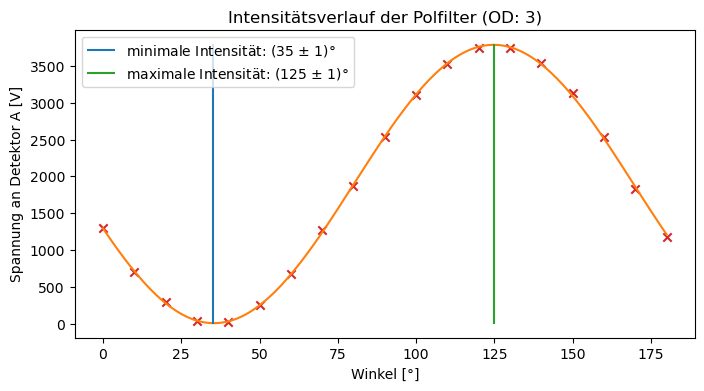

In [35]:
pol2 = np.arange(0,181,10)
pol2_intensity = np.array([1.30,0.70,0.29,0.04,0.03,0.25,0.68,1.27,1.87,2.54,3.11,3.52,3.74,3.74,3.54,3.13,2.54,1.83,1.18])
pol2_intensity = measured_to_real(pol2_intensity,3)

popt, pcov = curve_fit(malus,pol2,pol2_intensity,p0=[3500,1,1,1])
I_0, A, B, C = popt
print(popt)

# Scatter-Plot Daten
plt.figure(figsize=(8,4))
plt.xlabel('Winkel [°]')
plt.ylabel('Spannung an Detektor A [V]')
plt.title('Intensitätsverlauf der Polfilter (OD: 3)')
plt.scatter(pol2,pol2_intensity,marker='x',color='tab:red')

# Fit Malus-Gesetz
xfit = np.arange(0,181,1)
yfit = malus(xfit,I_0,A,B,C)
plt.plot(xfit,yfit,color='tab:orange')

min_index = np.argmin(yfit)
max_index = np.argmax(yfit)
minimum = xfit[min_index]
maximum = xfit[max_index]
plt.vlines(minimum,ymin=0,ymax=3800,colors='tab:blue',label=f'minimale Intensität: ({minimum} $\pm~1$)°')
plt.vlines(maximum,ymin=0,ymax=3800,colors='tab:green',label=f'maximale Intensität: ({maximum} $\pm~1$)°')


plt.legend()
plt.savefig('figures/optiken/polfilter.pdf')

sum = 2.95*2+9.99+1.39+4.19+11.99+14.89+1.99+9.99*2+2.95+1.59+9.99*2+0.95+2.95+8.99
print(sum)